# Assigment 5

## Upload your code (.ipynb) on Learn dropbox and submit pdfs of the code and to Crowdmark.

## -----------------------------------------------------------------------------------------------------------

## Classification

Download the dataset 
    news20.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#news20.binary
Check Assignment 4 for instructions about loading this dataset.

Question 1
-------------

Solve the l1-regularized logistic regression problem
$$\mbox{minimize}_{x\in\mathbb{R}^d,\beta\in\mathbb{R}} \ \lambda \|x\|_1 + \frac{1}{n} \sum_{i=1}^n \log (1+ \exp(-b_i(a_i^Tx + \beta)))$$
using 

1) Proximal gradient descent

2) Accelerated proximal gradient descent

3) Proximal coordinate descent

4) Accelerated proximal coordinate descent

Tune the model parameter $\lambda$ and any parameters that the algorithms have. You only have to tune $\lambda$ once and use the same $\lambda$ for all algorithms. Use similar techniques to Assignment 4 to tune $\lambda$. Plot the objective function (y-axis) vs running time in sec (x-axis) for all algorithms in the same plot. Make sure that the plots are clean and use appropriate legends. Report your generalization error. This should be measured in the same way as Assignment 4.

For training split the data into training (the first 15996 datapoints), validation (the next 2000 datapoints) and testing (the next 2000 datapoints). Do not use the testing data to influence training in any way. This means that you should compute the generalization error only once when you finish your work with this part of the assignment.

Marks: 15

Question 2
-------------

Pick one algorithm that you want and plot the number of nonzeros in the output of the algorithm against $\lambda$. Explain in a couple of sentences (or less) what do you observe.

Marks: 10

In [1]:
# Load this auxiliary package.
import sys
import os

sys.path.append(os.getcwd()+'/libsvm-3.24/python/')
from svmutil import *

# Numpy is useful for handling arrays and matrices.
import numpy as np
import matplotlib.pyplot as plt

# my import 
from numpy.linalg import norm
import math, random, time, random
from scipy import real, ndimage
from scipy.sparse import *
from sklearn.feature_extraction import DictVectorizer
from  scipy.sparse.linalg import expm
from sklearn.utils import shuffle



b, A = svm_read_problem('./news20.binary')
vec = DictVectorizer()
A_read = vec.fit_transform(A).tocsr()
b_read = np.array(b).reshape(len(b),1)
features = A_read.shape[1]
# shuffle 
A_shuffle, b_shuffle = shuffle(A_read, b_read)
# Ax+beta = b 
# add one columns of 1 to A
A_ = hstack((A_shuffle, csr_matrix(np.ones(shape=(A_read.shape[0],1), dtype=float), shape=(len(b_read),1)))).tocsr()
b_ = b_shuffle


In [72]:
# initialize x0
print('# of features:',features)
x0 = np.zeros((A_.shape[1],1))
x1 = np.ones((A_.shape[1],1))
xRandom = np.random.uniform(0.0,1.0,(A_.shape[1],1))

print('features:',features)
print('{:20s} {:40s} {:20s} '.format('var_name','type','shape'))
print('{:20s} {:40s} {:20s} '.format('A_',str(type(A_)),str(A_.shape)))
print('{:20s} {:40s} {:20s} '.format('b_',str(type(b_)),str(b_.shape)))
print('{:20s} {:40s} {:20s} '.format('x0',str(type(x0)),str(x0.shape)))

##########################################################################################################
# split A and b to training, validation and testing
# training: 15996, validation : 2000, testing: 2000
##########################################################################################################
A_training = A_[:15996]
b_training = b_[:15996]

A_validation = A_[15996:17996]
b_validation = b_[15996:17996]

A_testing = A_[17996:]
b_testing = b_[17996:]


print('{:20s} {:40s} {:20s} '.format('-----','-----','-----'))
print('{:20s} {:40s} {:20s} '.format('A_training',str(type(A_training)),str(A_training.shape)))
print('{:20s} {:40s} {:20s} '.format('A_validation',str(type(A_validation)),str(A_validation.shape)))
print('{:20s} {:40s} {:20s} '.format('A_testing',str(type(A_testing)),str(A_testing.shape)))
print('{:20s} {:40s} {:20s} '.format('b_training',str(type(b_training)),str(b_training.shape)))
print('{:20s} {:40s} {:20s} '.format('b_validation',str(type(b_validation)),str(b_validation.shape)))
print('{:20s} {:40s} {:20s} '.format('b_testing',str(type(b_testing)),str(b_testing.shape)))



# of features: 1355191
features: 1355191
var_name             type                                     shape                
A_                   <class 'scipy.sparse.csr.csr_matrix'>    (19996, 1355192)     
b_                   <class 'numpy.ndarray'>                  (19996, 1)           
x0                   <class 'numpy.ndarray'>                  (1355192, 1)         
-----                -----                                    -----                
A_training           <class 'scipy.sparse.csr.csr_matrix'>    (15996, 1355192)     
A_validation         <class 'scipy.sparse.csr.csr_matrix'>    (2000, 1355192)      
A_testing            <class 'scipy.sparse.csr.csr_matrix'>    (2000, 1355192)      
b_training           <class 'numpy.ndarray'>                  (15996, 1)           
b_validation         <class 'numpy.ndarray'>                  (2000, 1)            
b_testing            <class 'numpy.ndarray'>                  (2000, 1)            


In [3]:
# set parameters:
MAX_ITERATION = 1000
LAMBDA =0.001
GAMMA = 0.5
THETA = GAMMA
EPSILON = 0.01





In [24]:
# Proximal gradient descent
# g(x) = lambda|x|1
# f(x) = blah...blah...


##########################################################################################################
# some helper functions, get regression gradient, get regression loss
# proximal for each step
# 
##########################################################################################################


# return gradient of f(x)
def get_regression_gradient(A,x,b):
#     print('aaaaaaaaaaaaaaaa', A.shape, x.shape, b.shape)
    grad = (1/A.shape[0] * np.sum(A.multiply((-b/(np.exp(b * A.dot(x)) + 1))), axis = 0)).transpose()
#     print('grad.shape',grad.shape)
    return grad


# l1-regularized logistic regression
def get_regression_loss(A,x,b,lambda_):
#     loss = lambda_ * np.sum(np.abs(x)) + (1 / A.shape[0]) * (np.sum(np.log(1 + np.exp(- b * A.dot(x)))))
    loss = get_g_value(x,lambda_) + get_f_value(A,x,b)
    return loss

# logistic regression function can be splitted to f(x) and g(x)
def get_g_value(x,lambda_):
    return lambda_ * np.sum(np.abs(x))
    
def get_f_value(A,x,b):
    return (1 / A.shape[0]) * np.sum(np.log(1 + np.exp(- b * A.dot(x))))

# one iteration of the proximal gradient 
def proximal(A, x, b, alpha_, lambda_):
    grad = get_regression_gradient(A, x, b)
#     print('proximal, shape', A.shape, x.shape, b.shape)
    z = x - alpha_ * grad
    a = alpha_ * lambda_
    result = np.where(z >= a, z-a, 0)
    result = np.where(z <= -a, z+a, result)
#     print('result.shape',result.shape)
    return result


# l(x) = g(x) + f(x) + gradient(x) * delta x; lecture 13, P21
def linearization(A, b, x_, x, lambda_):
    g = lambda_ * np.sum(np.abs(x_))
    f = (1 / A.shape[0]) * (np.sum(np.log(1 + np.exp(- b * A.dot(x)))))
    diff = get_regression_gradient(A, x, b).transpose().dot(x_ - x)
    l_x = g + f + diff[0,0]
    return l_x

print(linearization(A_training,b_training,x1,x0,0.0001))
print(proximal(A_training,x0,b_training,100,0.00001).shape)

137.19675505193405
(1355192, 1)


In [43]:
# armijo_line_search

def armijo_line_search(A, x, b, lambda_, theta_):
#     print('armijo, shapes', A.shape, x.shape,b.shape)
    alpha_ = 100
#     alpha_ = ALPHA
    xa = proximal(A, x, b, alpha_, lambda_)
    
    F_xk = get_regression_loss(A, x, b, lambda_)
    LHS = get_regression_loss(A, xa, b, lambda_)

    # linearization of xk is just the regression loss...
    RHS = F_xk - theta_ * (F_xk - linearization(A, b, xa, x, lambda_))
    while LHS > RHS:
        alpha_ = alpha_ / 2
        xa = proximal(A, x, b, alpha_, lambda_)
        LHS = get_regression_loss(A, xa, b, lambda_)
        # xk does not change... we are finding stepsize for this iteration...
        RHS = F_xk - theta_ * (F_xk - linearization(A, b, xa, x, lambda_))
    return alpha_, xa

# x = np.random.normal(0.0,1.0,[A_training.shape[1],1])/A_training.shape[1]
a,xa = armijo_line_search(A_training,x0,b_training,0.0001,0.05)
print(a)

100


In [140]:
# Proximal gradient descent
# suffix: pgd
def proximal_gradient_descent(A, x0, b, max_iterations, lambda_, theta_, epsilon_,recordX=False, printDetail=False):
    x, loss, count, st = x0, get_regression_loss(A,x0,b,lambda_), 1, time.time()
    time_diff = st-st
    x_list, loss_list, time_list = [x0], [loss],[st-st]
    if printDetail:
        print('{:10s} {:10s} {:10s} {:10s}'.format('count', 'alpha_', 'loss', 'time_diff'))
    while count <= max_iterations:
        alpha_ = 100
        # alpha_ = ALPHA
        alpha_, xa = armijo_line_search(A, x, b, lambda_, theta_)
        loss = get_regression_loss(A,xa,b,lambda_)
        g_x = np.linalg.norm((1 / alpha_) * (x - xa),2)
        if g_x < epsilon_: break
        time_diff = time.time() -st
        time_list.append(time_diff)
        loss_list.append(loss)
        x = xa
        ## printDetail and RecordX
        if printDetail:
            print('{:10d} {:10f} {:10f} {:10s}'.format(count, alpha_, loss, str(time_diff)))
        if recordX:
            x_list.append(xa)
        count+=1
    if printDetail:
        print('{:10d} {:10f} {:10f} {:10s}'.format(count, alpha_, loss, str(time_diff)))
    if recordX:
        return x_list, loss_list, time_list
    else:
        return x, loss_list, time_list
        

In [142]:
x_pgd, loss_pgd, time_pgd = proximal_gradient_descent(A_training, x0, b_training, MAX_ITERATION, LAMBDA, THETA, EPSILON,False,True)

count      alpha_     loss       time_diff 
         1 100.000000   0.672758 0.46935153007507324
         2   3.125000   0.670730 2.8956105709075928
         3  25.000000   0.667312 4.14552640914917
         4   3.125000   0.665431 6.590547800064087
         5  25.000000   0.662105 7.845210313796997
         6   3.125000   0.660363 10.264087438583374
         7  25.000000   0.657232 11.51492714881897
         8   3.125000   0.655523 13.933623313903809
         9  25.000000   0.652484 15.184528827667236
        10   3.125000   0.650888 17.59311556816101
        11  25.000000   0.648045 18.853702783584595
        12   3.125000   0.646457 21.33384132385254
        13  25.000000   0.643711 22.588024377822876
        14   3.125000   0.642208 25.030194520950317
        15  25.000000   0.639663 26.32893681526184
        16   3.125000   0.638140 28.767924308776855
        17  25.000000   0.635703 30.012696027755737
        18   3.125000   0.634236 32.4350643157959
        19  25.000000   0.632

In [ ]:
# # Accelerated proximal gradient descent
# # suffix: apgd
# def acce_proximal_gradient_descent(A, x0, b, max_iterations, lambda_, theta_, epsilon_,recordX=False, printDetail=False):
#     x_list = list()
#     loss_list = list()
#     gradient_list = list()
#     time_list = list()
    
#     x_prev = x0
#     count = 0
#     start = time.time()
#     loss = get_regression_loss(A, x_prev, b, lambda_)
#     print(loss)
    
#     loss_list.append(loss)
#     time_list.append(time.time() - start)
#     x_list.append(x_prev)
#     y = x0
#     t = 1
#     if printDetail:
#         print('{:10s} {:10s} {:10s} {:10s}'.format('count', 'alpha_', 'loss', 'time_diff'))
#     while count <= max_iterations:
#         alpha_ = 100
#         # alpha_ = ALPHA
#         alpha_, x = armijo_line_search(A, y, b, lambda_, theta_)
#         loss = get_regression_loss(A,x,b,lambda_)
#         g_x = np.linalg.norm((1 / alpha_) * (y - x),2)
        
#         # update x,y,t,k
#         tk = t
#         t_new = (1 + np.sqrt(1 + 4*(t**2)))/2
#         y = x + ((tk-1)/t) * (x - x_prev)
#         x_prev = x
        
#         time_diff = time.time() - start
#         time_list.append(time_diff)
#         loss_list.append(loss)
#         if g_x < epsilon_: 
#             break
#         ## printDetail and RecordX
#         if printDetail:
#             print('{:10d} {:10f} {:10f} {:10s}'.format(count, alpha_, loss, str(time_diff)))
#         if recordX:
#             x_list.append(xa)
#         count+=1
# #     print info for last iteration if required   
#     if printDetail:
#         print('{:10d} {:10f} {:10f} {:10s}'.format(count, alpha_, loss, str(time_diff)))
#     if recordX:
#         return x_list, loss_list, time_list
#     else:
#         return x, loss_list, time_list
        

In [ ]:
# x_apgd, loss_apgd, time_apgd = acce_proximal_gradient_descent(A_training, x1, b_training, 1000, 0.0001, 0.5, 1.0e-2,False,True)

In [143]:
def acce_proximal_gradient_descent(A, x0, b, max_iterations, lambda_, theta_, epsilon_, recordX=False, printDetail=False):
    x, loss, count, st = x0,get_regression_loss(A, x0, b, lambda_),0,time.time()
    x_list, loss_list, time_list = [x0], [loss],[st-st]
    x_prev = x0
    
    loss_list.append(loss)
    time_list.append(time.time() - st)
    x_list.append(x_prev)
    y = x0
    t = 1
    if printDetail:
        print('{:10s} {:10s} {:10s} {:10s}'.format('count', 'alpha_', 'loss', 'time_diff'))

    while count <= max_iterations:
        alpha_, x = armijo_line_search(A, y, b, lambda_, theta_)
        g_x = np.linalg.norm((1 / alpha_) * (y - x), 2)
        loss = get_regression_loss(A, x, b, lambda_)
        tk = t
        t = (1 + np.sqrt(1 + 4 * (tk ** 2))) / 2
        y = x + ((tk - 1) / t) * (x - x_prev)
        x_prev = x

        time_diff = time.time() - st
        time_list.append(time_diff)
        loss_list.append(loss)
        if g_x < epsilon_: 
            break
        ## printDetail and RecordX
        if printDetail:
            print('{:10d} {:10f} {:10f} {:10s}'.format(count, alpha_, loss, str(time_diff)))
        if recordX:
            x_list.append(xa)
        count+=1
#     print info for last iteration if required   
    if printDetail:
        print('{:10d} {:10f} {:10f} {:10s}'.format(count, alpha_, loss, str(time_diff)))
    if recordX:
        return x_list, loss_list, time_list
    else:
        return x, loss_list, time_list



In [145]:
x_acc_pgd, loss_acc_pgd, time_acc_pgd = acce_proximal_gradient_descent(A_training, x0, b_training, MAX_ITERATION, LAMBDA, THETA, EPSILON,False,True)

count      alpha_     loss       time_diff 
         0 100.000000   0.690236 0.45471644401550293


In [ ]:
ALPHA = 1000
def coordinate_armijo_line_search(A, b, x, lambda_, alpha_, theta_, batch, recordX=False, printDetail=False):
    x_a = x
    x_ = coordinate_prox(A, b, x, alpha_, lambda_, batch)
    x_a[batch, :] = x_
    F_x = get_regression_loss(A, x, b, lambda_)
    l_x = coordinate_linearization(A, b, x, x, lambda_, batch)
    compare_1 = l1_logistic_regression(A, b, x_a, lambda_)
    compare_2 = F_x - theta_ * (l_x - coordinate_linearization(A, b, x_a, x, lambda_, batch))
    while compare_1 > compare_2:
        alpha_ = alpha_ / 2
        x_ = coordinate_prox(A, b, x, alpha_, lambda_, batch)
        x_a[batch, :] = x_
        compare_1 = l1_logistic_regression(A, b, x_a, lambda_)
        compare_2 = F_x - theta_ * (l_x - coordinate_linearization(A, b, x_a, x, lambda_, batch))
    return alpha_, x_a

## Label Propagation

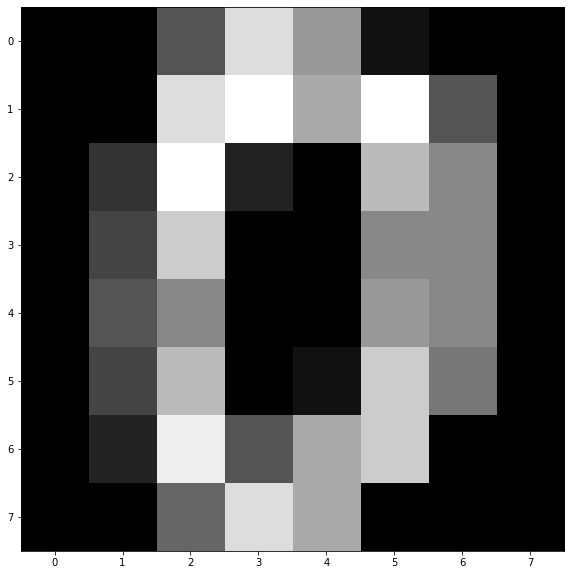

In [97]:
# Load datasets from sklearn
from sklearn import datasets

# Load the digits dataset.
# See here for a distription of this dataset: 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
digits = datasets.load_digits()

# Briefly, this dataset has 1797 images of digits. The digits are from 0 to 9.
# There are about 180 images per digit.

# digits.data includes the vectorized images of the digits
# digits.target includes the labels of the images
# digits.images includes the images in non-vectorized format

# Example: number 0
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 10))
plt.imshow(digits.images[0], cmap='gray')
plt.show()

Let x_i and x_j be two vectorized images.
Compute their pairwise similarity by
$$ 
w_{ij} = \exp(-\gamma \|x_i-x_j\|_2^2),
$$
where $\gamma$ is parameter tha controls the importance of the distance $\|x_i-x_j\|_2^2$. If $\gamma=1/(2\sigma^2)$ then this is called the Gaussian kernel and $\sigma^2$ represents the variance.
You can compute the similarities by using: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html.
Alterantively, you can compute the pairwise similarities manually, by using the above formula.

Sparsify the graph by setting small values to zero. The thresholding tolerance is a parameter that you will have to tune. Generally, there is a consensus that sparse similarity matrices result in better performance. So, you should expect that, but have in mind that this is only an empirical observation.

In [57]:
# Example
import sklearn

# Pairwise weights matrix
W = sklearn.metrics.pairwise.rbf_kernel(digits.data)

# Remove self-similarity
import numpy as np
W = W - np.eye(len(W))

# Sparsify (tune the tolerance parameter for your problem)
tol = 1e-16
W[abs(W) < tol] = 0.0

This dataset provides labels for every image of a digit. However, in this assignment we want to check how the label propagation model works. Use all images, i.e., 1797 images of digits, but use only 10 labels per type of digit, e.g., use the first 10 labels for digit 0, the first 10 labels of digit 1 etc. This means that you should use 100 labels in total out of 1797. Do not use the remaining labels for training the model. The remaining labels will be used only to measure accuracy of the model.

Question 3
-------------
Train the label propagation model
$$
\mbox{minimize}_{b\in\mathbb{R}^n} \ \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n w_{ij} (b_i -b_j)^2 + \sum_{i=1}^{m-n}\sum_{j=1}^n \bar{w}_{ij} (\bar{b}_i -b_j)^2
$$
using the coordinate method that was discussed in Lecture 14 for the label propagation problem. Make sure that you understand the derivation of the algorithm before you apply it to train the label propagation model.

The output of the algorithm should be the soft labels $b$ for each image. However, these soft labels are not going to be integers (actual labels). Therefore, we have to round the output labels $b$ to get integer labels for each image. One possible way to round the output is to simply find the integer label (possible options 0 to 9) that a soft label is closest to. Then pick this label as the label of the image.

After you label all images, use the function in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html to measure precision, recall and f1_score. You only have to provide the true and the predicted labels when using this function. Do not change the default parameters.

If you want to learn more about precision, recall and f1_score check Wikipedia: 
precision and recall: https://en.wikipedia.org/wiki/Precision_and_recall
f1_score: https://en.wikipedia.org/wiki/F1_score.

Report precision, recall and f1score of your method.

Marks: 20

Question 4
-------------

Increase the number of labels that are used in the model from 10 per digit to 20 per digit. Re-train and report precision, recall and f1score of your method. Explain in a couple of sentences what do you observe.

Marks: 5

## Local Graph Clustering 

In [10]:
import numpy as np

# Import networkx to load the data
import networkx as nx

# Provide the path of the dataset JohnsHopkins55
path = 'JohnsHopkins55.graphml'

# This dataset is a Facebook anonymized dataset on a particular day in September 2005 
# for a student social network at John Hopkins university. The graph is unweighted 
# and it represents ``friendship'' ties. This graph has 5157 nodes and 186572 edges. 
# This dataset comes along with 6 features, i.e., second major, high school, gender, dorm, major index and year. 
# We construct ``ground truth'' clusters by using the features for each node.
# In particular, we consider nodes with the same value of a feature to be a cluster, e.g., students of year 2009. 
# For this assignment we will attempt to find the students of year 2009 using local graph clustering.

# Load the data as a graph
G = nx.read_graphml(path).to_undirected()

# Construct the adjacency matrix
A = nx.adjacency_matrix(G).astype(np.float64)

# Indices of nodes (students) of class year 2009
# There should be 910 students of class year 2009.
# We will use these students to measure performance of the model
students_of_year_2009 = []
ct = 0
for node in G.nodes(data=True):
    if node[1]['year'] == 2009:
        students_of_year_2009.append(ct)
    ct += 1
print(len(students_of_year_2009))

910


The target cluster is the students of year 2009 in the list: students_of_year_2009.

For this problem you will have to use the coordinate algorithm that was introduced in Lecture 14.

The coordinate algorithm returns a vector $p$. To get an actual cluster from vector $p$ you will have to round the output of the coordinate algorithm using the rounding technique that was discussed in Lecture 14. 

To measure accuracy of the rounded output you can use number of true positives and the number of false positives of the predicted cluster. True positives are the predicted nodes that are also part of class year 2009. False positive are the number of predicted nodes that are not part of the class year 2009.

Question 5
-------------

1) Report the number of nonzero nodes in the output of the coordinate algorithm (vector $p$) as the tolerance parameter $\epsilon$ goes to zero. In particular, plot the number of nonzeros in the output $p$ against $\epsilon$.
The number of nonzeros should increase as $\epsilon$ goes to zero.

Marks: 10

Question 6
-------------

2) Run the coordinate algorithm using as seed node the node with index 5000. Round the output to get an actual cluster back. Measure true positives and false positives of the predicted cluster. Report these two numbers.

Marks: 10

Question 7
-------------

3) Run the coordinate algorithm using as seed node the node with index 146. Round the output to get an actual cluster back. Measure true positives and false positive of the predicted cluster. Report these two numbers. How do they compare to the results in 2) ? Are they different? If yes, why do you think this might have happened? Explain intuitively in a couple of sentences why you think this might happen.

Marks: 5

## Reccomender System

Download the data matrix $A$ from the webiste https://grouplens.org. Navigate to the dataset tab https://grouplens.org/datasets/movielens/ and download the dataset MovieLens 100K. Read the description of the dataset carefully. 
This dataset includes 5 data matrices $A$. We only need to use one of these in this assignment. In particular, use the dataset u1.base. Use the corresponding testing data u1.test to measure the accuracy of your model. For this question only it's ok if you use the testing data to tune parameters. Ignore the timestap feature in the dataset. We do not need this for this problem.

Question 8
------------

Solve the penalized problem
$$
\mbox{minimize} \ \lambda \|X\|_* + \sum_{ij \ | \ A_{ij} \ is \ known} (X_{ij} - A_{ij})^2,
$$
where $\|X\|_*$ is the nuclear norm, using proximal gradient descent. This algorithm requires thresholding the singular values of $X$ at each iteration.
You can use https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html (sparse matrices) or https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html (dense matrices).

To check your solution against u1.test, report your score as follows. Let $X$ be the output of the proximal gradient method, let $A'$ and $\Omega'$ be the data matrix and the non-zero entry list for the test data. Then the score is 
$$
\frac{1}{|\Omega'|} \sum_{(i,j)\in\Omega'} | X_{ij} - A_{ij}'|.
$$
In other words, the average absolute deviation of the computed ratings from the predicted ratings. Report your score.

Marks: 15

Question 9
------------

Now consider the factorized problem
$$
\mbox{minimize}_{L,R} \ \frac{\lambda}{2} \left(\|L\|_F^2 + \|R\|_F^2\right) + \|W\circ (LR^T-A)\|_F^2
$$
See Lecture 15 about details for this problem. Solve this problem and obtain the matrix $X=LR^T$. Use $X$ as the predicted rating and report your score. For calculating derivatives of matrix functions you can have a look here: https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf. 

Marks: 10

## Nonnegative Matrix Factorization: facial feature extraction

Dataset consists of 400 faces


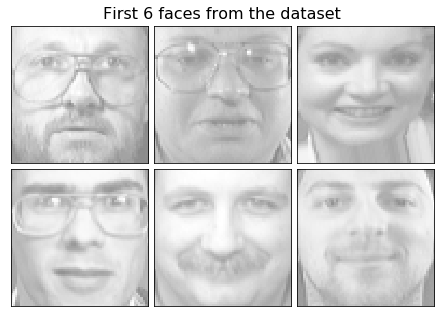

In [36]:
# This piece of code is for loading data and visualizing 
# the first 6 images in the dataset.

# Useful packages for loading the data and plotting
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

n_row, n_col = 2, 3
image_shape = (64, 64)
rng = RandomState(0)

# Useful function for plotting
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)

# Store the vectorized images. Each image has dimensions 64 x 64.
faces = dataset.data

print("Dataset consists of %d faces" % n_samples)
    
plot_gallery("First 6 faces from the dataset", faces[:6])    

Question 10
--------------

Use the data in "faces" from the above code for the nonnegative matrix factorization problem 
\begin{align*}
\mbox{minimize}_{W,H} &  \ \| WH-X\|_F^2\\
\mbox{subj. to} & \ W_{ij}\ge 0 \ \forall i,j \\
                &  \ H_{ij}\ge 0 \ \forall i,j
\end{align*}
where $W\in\mathbb{R}^{m\times r}$ and $H\in\mathbb{R}^{r\times n}$.
Set parameter $r=6$ in the nonnegative factorization problem. Extract the features matrix $W$ by solving the non-negative matrix factorization problem. Report the 6 features of the faces dataset, i.e., the 6 columns of matrix $W$. You can report the features by visualizing them in a similar way to the above example.

Marks: 15

Question 11
--------------

Visualize the approximation of the first 6 images using the feature matrix $W$ and the importance matrix $H$. Note that each face can be approaximated by a linear combination of features (columns) from matrix $W$. The positive coefficients of this linear combination are given by matrix $H$.

Marks: 5

Question 12
--------------

Use matrix $H$ to find the 3 most important features of the first 6 faces. To find the 3 most important features for an image pick the columns of $W$ with the largest coefficients in matrix $H$.

Marks: 5